In [2]:
import urllib.request
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import json
from scipy import stats
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

In [12]:
raw_data = pd.read_csv("../src/csv/Fire-Incidents.csv")

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            11214 non-null  object 
 1   Business_Impact                           11214 non-null  object 
 2   Civilian_Casualties                       11214 non-null  int64  
 3   Count_of_Persons_Rescued                  11214 non-null  int64  
 4   Estimated_Dollar_Loss                     11214 non-null  int64  
 5   Estimated_Number_Of_Persons_Displaced     11214 non-null  int64  
 6   Ext_agent_app_or_defer_time               11214 non-null  object 
 7   Extent_Of_Fire                            11214 non-null  object 
 8   Fire_Alarm_System_Impact_on_Evacuation    11214 non-null  object 
 9   Fire_Alarm_System_Operation               11214 non-null  object 
 10  Fire_Alarm_System_Presence        

In [7]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Civilian_Casualties,11214.0,0.112538,0.456429,0.000000,0.000000,0.000000,0.00000,1.500000e+01
Count_of_Persons_Rescued,11214.0,0.062154,0.962587,0.000000,0.000000,0.000000,0.00000,8.600000e+01
Estimated_Dollar_Loss,11214.0,42943.693419,533936.667426,0.000000,250.000000,2500.000000,15000.00000,5.000000e+07
Estimated_Number_Of_Persons_Displaced,11214.0,17.274835,119.071696,0.000000,0.000000,0.000000,1.00000,9.990000e+02
Incident_Station_Area,11214.0,288.281880,107.515995,111.000000,221.000000,314.000000,346.00000,4.450000e+02
Incident_Ward,11181.0,19.582685,11.762782,1.000000,10.000000,19.000000,28.00000,4.400000e+01
Latitude,11214.0,43.705190,0.051183,43.588926,43.662474,43.697050,43.74777,4.384620e+01
Longitude,11214.0,-79.403323,0.101086,-79.635241,-79.479273,-79.403892,-79.33715,-7.912441e+01


In [8]:
raw_data.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [17]:
# podliczenie strat(ofiary, pieniądze, ilość przesiedlonych )
selected_columns = ['Civilian_Casualties', 'Estimated_Dollar_Loss','Count_of_Persons_Rescued','Estimated_Number_Of_Persons_Displaced']

sum_of_selected_columns = raw_data[selected_columns].sum()

print("Suma wybranych kolumn:")
print(sum_of_selected_columns)

Suma wybranych kolumn:
Civilian_Casualties                           1262
Estimated_Dollar_Loss                    481570578
Count_of_Persons_Rescued                       697
Estimated_Number_Of_Persons_Displaced       193720
dtype: int64


In [9]:

# Sprawdzanie brakujących danych
missing_data = raw_data.isnull().sum()

print("Liczba brakujących danych w poszczególnych kolumnach:")
print(missing_data)

Liczba brakujących danych w poszczególnych kolumnach:
Area_of_Origin                               0
Business_Impact                              0
Civilian_Casualties                          0
Count_of_Persons_Rescued                     0
Estimated_Dollar_Loss                        0
Estimated_Number_Of_Persons_Displaced        0
Ext_agent_app_or_defer_time                  0
Extent_Of_Fire                               0
Fire_Alarm_System_Impact_on_Evacuation       0
Fire_Alarm_System_Operation                  0
Fire_Alarm_System_Presence                   0
Fire_Under_Control_Time                      0
Ignition_Source                              0
Incident_Station_Area                        0
Incident_Ward                               33
Last_TFS_Unit_Clear_Time                     0
Latitude                                     0
Longitude                                    0
Material_First_Ignited                       0
Method_Of_Fire_Control                       0
Possib

In [13]:
clean_data = raw_data.drop(["Area_of_Origin",\
              "Business_Impact",\
              "Ext_agent_app_or_defer_time",\
              "Extent_Of_Fire",\
              "Incident_Station_Area",\
              "Incident_Ward",\
              "Material_First_Ignited",\
              "Method_Of_Fire_Control",\
              "Smoke_Alarm_at_Fire_Origin_Alarm_Failure",\
              "Smoke_Alarm_at_Fire_Origin_Alarm_Type",\
              "Status_of_Fire_On_Arrival"
                ], axis=1)
clean_data.to_excel("clean_data.xlsx", index=False)

In [14]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11214 entries, 0 to 11213
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Civilian_Casualties                     11214 non-null  int64  
 1   Count_of_Persons_Rescued                11214 non-null  int64  
 2   Estimated_Dollar_Loss                   11214 non-null  int64  
 3   Estimated_Number_Of_Persons_Displaced   11214 non-null  int64  
 4   Fire_Alarm_System_Impact_on_Evacuation  11214 non-null  object 
 5   Fire_Alarm_System_Operation             11214 non-null  object 
 6   Fire_Alarm_System_Presence              11214 non-null  object 
 7   Fire_Under_Control_Time                 11214 non-null  object 
 8   Ignition_Source                         11214 non-null  object 
 9   Last_TFS_Unit_Clear_Time                11214 non-null  object 
 10  Latitude                                11214 non-null  fl

In [15]:
clean_data.head()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Possible_Cause,Property_Use,TFS_Alarm_Time,TFS_Arrival_Time
0,0,86,3000,0,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24T17:06:28,Undetermined,2018-08-24T17:42:43,43.760357,-79.412479,Undetermined,Multi-Unit Dwelling - Over 12 Units,2018-08-24T16:49:36,2018-08-24T16:54:09
1,0,28,50000,28,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24T07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",2018-11-24T12:45:21,43.754542,-79.530419,Under Investigation,Infirmary,2018-11-24T07:09:12,2018-11-24T07:14:23
2,1,16,1000000,130,Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09T18:36:21,Undetermined,2017-02-09T23:36:33,43.657300,-79.373460,Undetermined,Multi-Unit Dwelling - Over 12 Units,2017-02-09T17:45:07,2017-02-09T17:48:49
3,0,12,1000000,14,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30T01:28:48,Undetermined,2012-11-01T16:30:31,43.649350,-79.393700,Undetermined,"Clothing Store, Accessories, fur",2012-10-30T00:42:01,2012-10-30T00:44:58
4,8,11,125000,2,Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08T04:38:28,Matches or Lighters (unable to distinguish),2018-07-08T16:44:07,43.697960,-79.511539,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,2018-07-08T04:08:50,2018-07-08T04:13:54


In [16]:
def get_date_time_from_str(timestamp_str):
    date_str = timestamp_str[0:timestamp_str.find('T')]
    time_str = timestamp_str[timestamp_str.find('T')+1:]
    [y,m,d] = [int(s) for s in date_str.split('-')]
    [hh,mm,ss] = [int(s) for s in time_str.split(':')]
    return datetime.datetime(y,m,d,hh,mm,ss)

In [17]:
clean_data['TFS_Alarm_Time'] =clean_data["TFS_Alarm_Time"].apply(lambda x: get_date_time_from_str(x))
clean_data['TFS_Arrival_Time'] =clean_data["TFS_Arrival_Time"].apply(lambda x: get_date_time_from_str(x))
clean_data['Fire_Under_Control_Time'] =clean_data["Fire_Under_Control_Time"].apply(lambda x: get_date_time_from_str(x))
clean_data['Last_TFS_Unit_Clear_Time'] =clean_data["Last_TFS_Unit_Clear_Time"].apply(lambda x: get_date_time_from_str(x))

In [18]:
clean_data['Day_Of_Week'] = clean_data["TFS_Alarm_Time"].apply(lambda x: x.weekday())
clean_data['Alarm_Time_Min_Of_Day'] = clean_data["TFS_Alarm_Time"].apply(lambda x: x.time().hour * 60 + x.time().minute)
clean_data['Alarm_Time_Hour_OF_Day'] = clean_data["TFS_Alarm_Time"].apply(lambda x: x.time().hour)
clean_data['Alarm_Time_Day_Of_Year'] = clean_data["TFS_Alarm_Time"].apply(lambda x: x.timetuple().tm_yday)
clean_data['Response_Time'] = clean_data.apply(lambda x: (x['TFS_Arrival_Time'] - x['TFS_Alarm_Time']).total_seconds(), axis=1)

In [18]:
clean_data.head()

,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,Fire_Alarm_System_Presence,Fire_Under_Control_Time,Ignition_Source,Last_TFS_Unit_Clear_Time,Latitude,Longitude,Possible_Cause,Property_Use,TFS_Alarm_Time,TFS_Arrival_Time
0,0,86,3000,0,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,Fire alarm system present,2018-08-24 17:06:28,Undetermined,2018-08-24 17:42:43,43.760357,-79.412479,Undetermined,Multi-Unit Dwelling - Over 12 Units,2018-08-24 16:49:36,2018-08-24 16:54:09
1,0,28,50000,28,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,Fire alarm system present,2018-11-24 07:19:00,"Other Cooking Items (eg Toaster, Kettle, elec ...",2018-11-24 12:45:21,43.754542,-79.530419,Under Investigation,Infirmary,2018-11-24 07:09:12,2018-11-24 07:14:23
2,1,16,1000000,130,Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2017-02-09 18:36:21,Undetermined,2017-02-09 23:36:33,43.657300,-79.373460,Undetermined,Multi-Unit Dwelling - Over 12 Units,2017-02-09 17:45:07,2017-02-09 17:48:49
3,0,12,1000000,14,Undetermined,Fire alarm system operation undetermined,Undetermined,2012-10-30 01:28:48,Undetermined,2012-11-01 16:30:31,43.649350,-79.393700,Undetermined,"Clothing Store, Accessories, fur",2012-10-30 00:42:01,2012-10-30 00:44:58
4,8,11,125000,2,Some persons (at risk) evacuated as a result o...,Fire alarm system operated,Fire alarm system present,2018-07-08 04:38:28,Matches or Lighters (unable to distinguish),2018-07-08 16:44:07,43.697960,-79.511539,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,2018-07-08 04:08:50,2018-07-08 04:13:54


In [19]:
#zapisanie wstępnie oczyszczonych danych 
clean_data.to_excel("../src/csv/clean_data.xlsx", index=False)

In [24]:
df_time =clean_data[['Response_Time', 'Latitude','Longitude', 'Alarm_Time_Min_Of_Day', 'Alarm_Time_Day_Of_Year','Day_Of_Week']]

In [26]:
#usuwanie wartości odstających
z_score = np.abs(stats.zscore(df_time))
df_time = df_time[(z_score < 2.5).all(axis=1)]
num_data_removed =  len(clean_data)-len(df_time)
print("removed %d outliers from total of %d records"%(num_data_removed,len(clean_data)))

removed 258 outliers from total of 11214 records


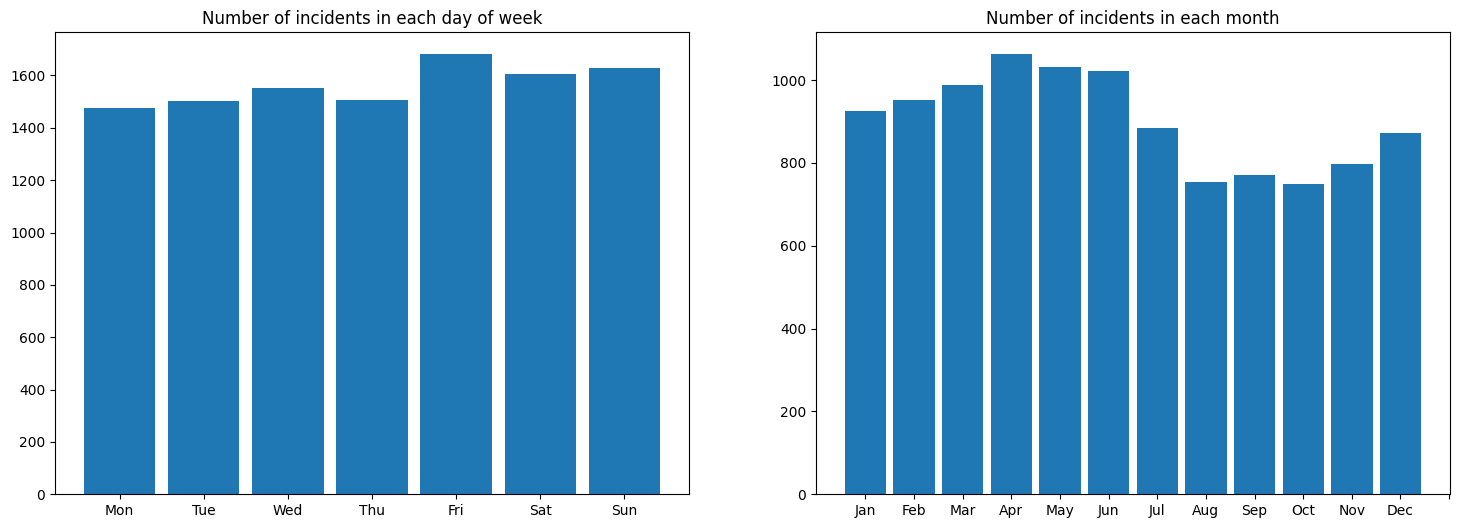

In [58]:
#wizualizacja czasu reakcji
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Histogram dla dnia tygodnia
ax1.hist(df_time['Day_Of_Week'], bins=np.arange(-.5, 7.5, 1.0), rwidth=0.85)
ax1.set_xticks(np.arange(7))
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_title('Number of incidents in each day of week')

# Histogram dla miesiąca
bins = np.arange(-.5, 365, 30)
ax2.hist(df_time['Alarm_Time_Day_Of_Year'], bins=bins, align='left', rwidth=0.85)
ax2.set_xticks(bins)
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''])
ax2.set_title('Number of incidents in each month')

plt.show()






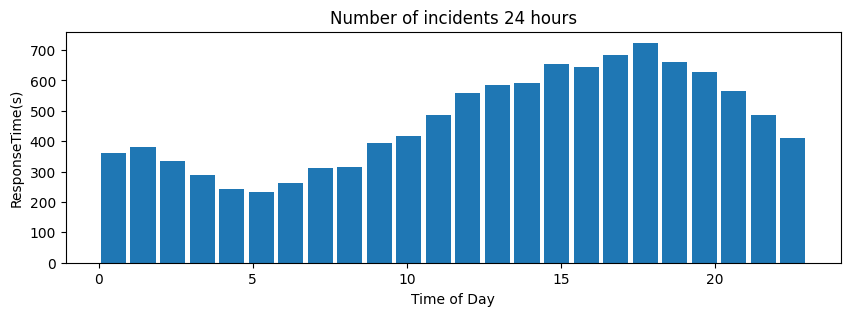

In [29]:
fig, ax = plt.subplots(figsize=(10, 3))
s=np.arange(-.5,24)
plt.hist(clean_data['Alarm_Time_Hour_OF_Day'], bins = 24, rwidth=0.85)
plt.title('Number of incidents 24 hours')
plt.xlabel('Time of Day')
plt.ylabel('ResponseTime(s)')

plt.show()